# **AI - Fall 00 - Computer Assignment 5 (Phase 2)**
### **Paria Khoshtab 810198387**

# Description
The goal of this project is getting more familiar with Keras and TensorFlow libraries in order to bulid a neural network model for predicting type of an animal in a given image.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from collections import Counter
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.utils import *
from sklearn.metrics import classification_report
from keras import regularizers

In [ ]:
!gdown --id 1AdJ0sGSwVrdtskKj27cjf1Q5Vi0zfP0Y

Downloading...
From: https://drive.google.com/uc?id=1AdJ0sGSwVrdtskKj27cjf1Q5Vi0zfP0Y
To: /content/dataset.zip
100% 894M/894M [00:08<00:00, 101MB/s]


In [ ]:
!unzip /content/dataset.zip

# Phase One: Preprocessing

In [ ]:
data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.3)

print('\nTrain dataset properties: ')
train = data_generator.flow_from_directory(
    '/content/dataset/train',
    color_mode = 'grayscale',
    target_size = (100, 100),
    shuffle = True,
    class_mode = 'categorical',
    subset = 'training',
    batch_size = 32)

train_unshuffled = data_generator.flow_from_directory(
    '/content/dataset/train',
    color_mode = 'grayscale',
    target_size = (100, 100),
    shuffle = False,
    class_mode = 'categorical',
    subset = 'training',
    batch_size = 32)

print('\nValidation dataset properties: ')
validation = data_generator.flow_from_directory(
    '/content/dataset/train',
    color_mode = 'grayscale',
    target_size = (100, 100),
    shuffle = True,
    class_mode = 'categorical',
    subset = 'validation',
    batch_size = 32)

validation_unshuffled = data_generator.flow_from_directory(
    '/content/dataset/train',
    color_mode = 'grayscale',
    target_size = (100, 100),
    shuffle = False,
    class_mode = 'categorical',
    subset = 'validation',
    batch_size = 32)

data_generator = ImageDataGenerator(
    rescale = 1./255)

print('\nTest dataset properties: ')
test = data_generator.flow_from_directory(
    '/content/dataset/test',
    color_mode = 'grayscale',
    target_size = (100, 100),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 32)

test_unshuffled = data_generator.flow_from_directory(
    '/content/dataset/test',
    color_mode = 'grayscale',
    target_size = (100, 100),
    shuffle = False,
    class_mode = 'categorical',
    batch_size = 32)


Train dataset properties: 
Found 1363 images belonging to 4 classes.
Found 1363 images belonging to 4 classes.

Validation dataset properties: 
Found 582 images belonging to 4 classes.
Found 582 images belonging to 4 classes.

Test dataset properties: 
Found 833 images belonging to 4 classes.
Found 833 images belonging to 4 classes.


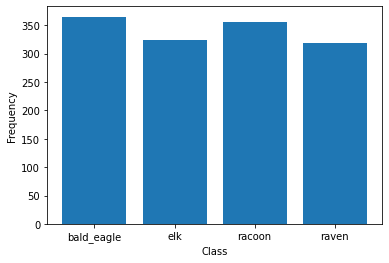

In [ ]:
class_names = list(train.class_indices.keys())
frequencies = list(Counter(train.classes).values())
plt.bar(class_names, frequencies)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


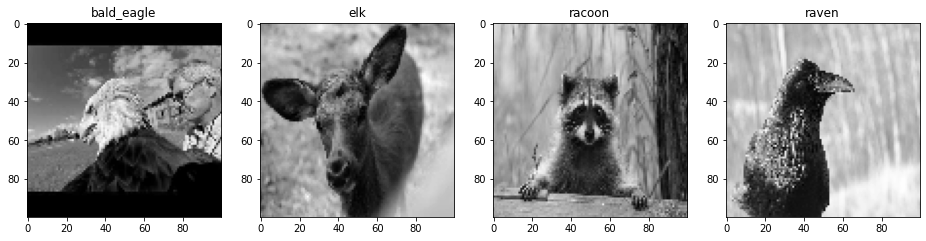

In [ ]:
num = 0
fig, axes = plt.subplots(1, train.num_classes, figsize=(16, 16))

for images, labels in train:
  if num == train.num_classes:
    break
  for i in range(len(labels)):
    if labels[i].argmax() == num:
      axes[num].set_title(class_names[num])
      axes[num].imshow(images[i].reshape((100, 100)), cmap = 'gray')
      num += 1

In [ ]:
images, labels = train.next()
print(labels[: 5])

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


**Why use one hot encoding?** <br>
As seen above, labels are one hot encoded in each iteration. We should prefer using the one hot encoding method, because the categorical labels(animals) present in the dataset are not ordinal. Other encoding methods like Label Encoding, encode labels with an ordinal ranking, in other words, they will read a higher number as better or more important than a lower number, this can lead to issues with predictions and poor performance. Additionally, we must also one hot encode the target variable so that we can develop a model that predicts the probability of a datapoint belonging to each class.

# Phase Two: Neural Network Implementation

In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 15, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/15
43/43 [==============================] - 55s 1s/step - loss: 1.4633 - accuracy: 0.3470 - val_loss: 1.3378 - val_accuracy: 0.3883
Epoch 2/15
43/43 [==============================] - 53s 1s/step - loss: 1.2164 - accuracy: 0.4585 - val_loss: 1.3300 - val_accuracy: 0.3402
Epoch 3/15
43/43 [==============================] - 53s 1s/step - loss: 1.1148 - accuracy: 0.5202 - val_loss: 1.1011 - val_accuracy: 0.5859
Epoch 4/15
43/43 [==============================] - 53s 1s/step - loss: 1.0792 - accuracy: 0.5525 - val_loss: 1.2140 - val_accuracy: 0.4124
Epoch 5/15
43/43 [==============================] - 53s 1s/step - loss: 1.0202 - accuracy: 0.5796 - val_loss: 1.0268 - val_accuracy: 0.5808
Epoch 6/15
43/43 [==============================] - 53s 1s/step - loss: 0.9827 - accuracy: 0.5972 - val_loss: 1.1241 - val_accuracy: 0.4519
Epoch 7/15
43/43 [==============================] - 53s 1s/step - loss: 0.9440 - accuracy: 0.6258 - val_loss: 1.0043 - val_accuracy: 0.5773
Epoch 8/15
43/43 [==

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 2048)              20482048  
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 22,584,324
Trainable params: 22,584,324
Non-trainable params: 0
_________________________________________________________________


The number of parameters in dense layer is 20482048 because with every hidden unit you have 10000 input weights and one weight of connection with bias. This means that every hidden unit gives us 10001 parameters. We have 2048 units so it sums up to 10001*2048=20482048. With the same scenario, the number of parameters in dense_1 and dense_2 layers are calculated in the same way.<br>
Sum of the number of parameters in these three layers is 'Total params'.

In [14]:
def display_model_history(history, model):
  plt.figure(figsize=(10, 5)) 
  plt.plot(history.history['accuracy'], label = 'Train')
  plt.plot(history.history['val_accuracy'], label = 'Validation')
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 5)) 
  plt.plot(history.history['loss'], label = 'Train')
  plt.plot(history.history['val_loss'], label = 'Validation')
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

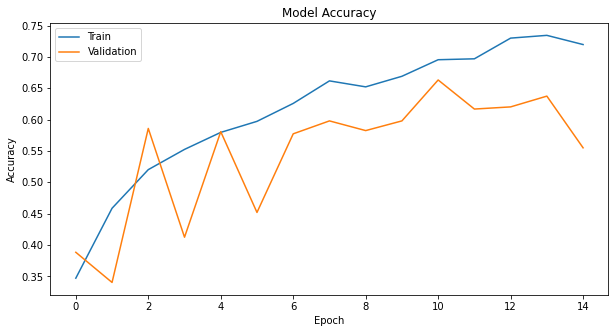

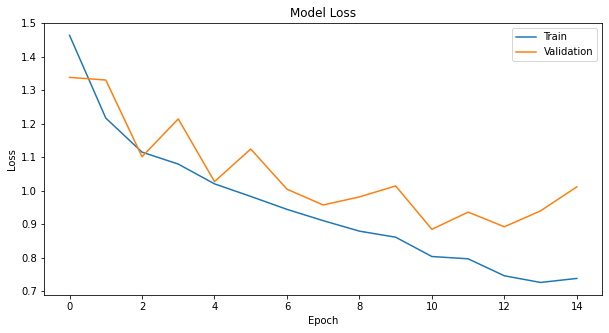

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(train_unshuffled), axis = 1)
actual = train_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.85      0.69      0.76       365
         elk       0.76      0.85      0.80       324
      racoon       0.85      0.86      0.86       355
       raven       0.77      0.84      0.80       319

    accuracy                           0.81      1363
   macro avg       0.81      0.81      0.81      1363
weighted avg       0.81      0.81      0.81      1363



In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.70      0.49      0.58       156
         elk       0.65      0.69      0.67       138
      racoon       0.69      0.71      0.70       152
       raven       0.63      0.79      0.70       136

    accuracy                           0.66       582
   macro avg       0.67      0.67      0.66       582
weighted avg       0.67      0.66      0.66       582



# Phase Three: Data Classification

### Impact of Optimizer

**What is momentum and why is it useful?**<br>
Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction $\gamma$
of the update vector of the past time step to the current update vector:
$Δ w_{i,j} = (\gamma*Δ w_{i,j}^{t-1}) - (η * \frac{\partial E}{\partial w_{i,j}}) ⇒ w_{i,j} = w_{i,j} + Δ w_{i,j}$ <br>
The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation. This leads to speeding up learning and not getting stuck in local minima.

**Does the result always improve with increasing momentum?**<br>
If the momentum term is large then the learning rate should be kept smaller. A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step.

*  **Momentum = 0.5**




In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 15, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/15
10/43 [=====>........................] - ETA: 30s - loss: 2.2481 - accuracy: 0.2215

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 55s 1s/step - loss: 1.5048 - accuracy: 0.3448 - val_loss: 1.2912 - val_accuracy: 0.3797
Epoch 2/15
43/43 [==============================] - 54s 1s/step - loss: 1.1898 - accuracy: 0.4637 - val_loss: 1.2142 - val_accuracy: 0.4227
Epoch 3/15
43/43 [==============================] - 54s 1s/step - loss: 1.1095 - accuracy: 0.5165 - val_loss: 1.0931 - val_accuracy: 0.5206
Epoch 4/15
43/43 [==============================] - 54s 1s/step - loss: 1.0728 - accuracy: 0.5569 - val_loss: 1.0746 - val_accuracy: 0.5086
Epoch 5/15
43/43 [==============================] - 54s 1s/step - loss: 0.9895 - accuracy: 0.5906 - val_loss: 1.0847 - val_accuracy: 0.5292
Epoch 6/15
43/43 [==============================] - 56s 1s/step - loss: 0.9490 - accuracy: 0.6244 - val_loss: 0.9504 - val_accuracy: 0.6254
Epoch 7/15
43/43 [==============================] - 54s 1s/step - loss: 0.9316 - accuracy: 0.6222 - val_loss: 1.0831 - val_accuracy: 0.5206
Epoch 8/15
43/43 [=============

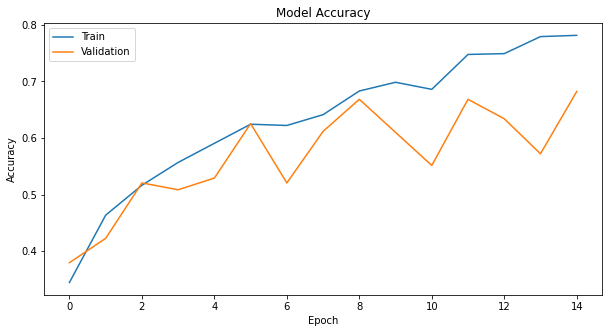

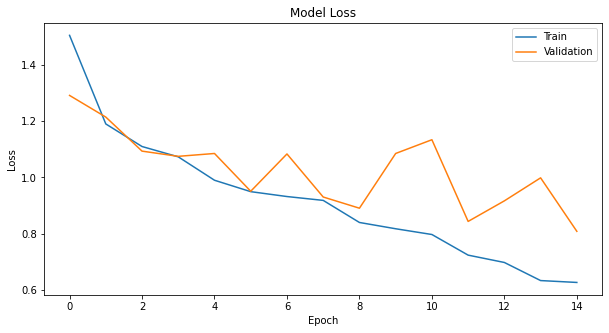

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.82      0.41      0.55       156
         elk       0.57      0.88      0.69       138
      racoon       0.76      0.71      0.73       152
       raven       0.70      0.76      0.73       136

    accuracy                           0.68       582
   macro avg       0.71      0.69      0.68       582
weighted avg       0.72      0.68      0.67       582



As can be seen above, the model with momentum = 0.5 has a 2% increase in f1-accuracy compared to model with momentum = 0.


*   **Momentum = 0.9**



In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 15, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/15
 2/43 [>.............................] - ETA: 1:28 - loss: 1.6593 - accuracy: 0.2812

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 56s 1s/step - loss: 1.6533 - accuracy: 0.3206 - val_loss: 1.2764 - val_accuracy: 0.4244
Epoch 2/15
43/43 [==============================] - 54s 1s/step - loss: 1.2603 - accuracy: 0.4043 - val_loss: 1.2634 - val_accuracy: 0.4021
Epoch 3/15
43/43 [==============================] - 55s 1s/step - loss: 1.1775 - accuracy: 0.4461 - val_loss: 1.1188 - val_accuracy: 0.5189
Epoch 4/15
43/43 [==============================] - 54s 1s/step - loss: 1.1524 - accuracy: 0.4593 - val_loss: 1.1540 - val_accuracy: 0.4570
Epoch 5/15
43/43 [==============================] - 54s 1s/step - loss: 1.1170 - accuracy: 0.5026 - val_loss: 1.1228 - val_accuracy: 0.4931
Epoch 6/15
43/43 [==============================] - 54s 1s/step - loss: 1.0952 - accuracy: 0.4930 - val_loss: 1.0714 - val_accuracy: 0.5275
Epoch 7/15
43/43 [==============================] - 54s 1s/step - loss: 1.0554 - accuracy: 0.5231 - val_loss: 1.1288 - val_accuracy: 0.4674
Epoch 8/15
43/43 [=============

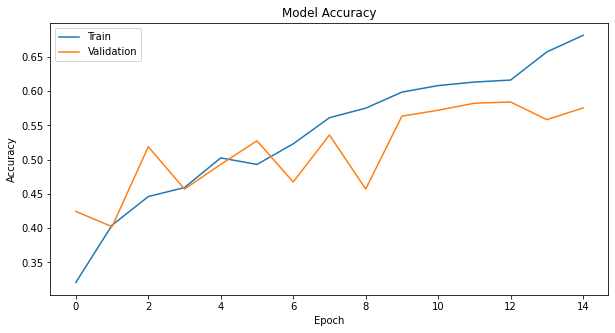

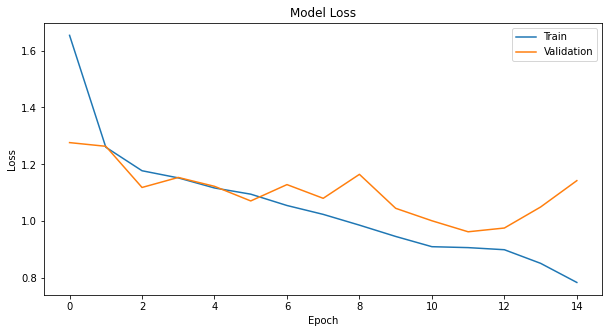

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.74      0.32      0.45       156
         elk       0.50      0.83      0.62       138
      racoon       0.74      0.44      0.55       152
       raven       0.56      0.79      0.66       136

    accuracy                           0.58       582
   macro avg       0.63      0.60      0.57       582
weighted avg       0.64      0.58      0.57       582



As can be seen above, this model with momentum = 0.9 is not accurate compared to the model with momentum = 0, because increasing the momentum leads to jumping over global minimum/maximum.

**Adam Optimizer**

In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 15, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/15
 5/43 [==>...........................] - ETA: 35s - loss: 23.1695 - accuracy: 0.2925

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 57s 1s/step - loss: 5.0859 - accuracy: 0.3213 - val_loss: 1.2565 - val_accuracy: 0.3711
Epoch 2/15
43/43 [==============================] - 55s 1s/step - loss: 1.2637 - accuracy: 0.4123 - val_loss: 1.2743 - val_accuracy: 0.3969
Epoch 3/15
43/43 [==============================] - 56s 1s/step - loss: 1.2038 - accuracy: 0.4505 - val_loss: 1.1798 - val_accuracy: 0.4381
Epoch 4/15
43/43 [==============================] - 55s 1s/step - loss: 1.1532 - accuracy: 0.4585 - val_loss: 1.0957 - val_accuracy: 0.5034
Epoch 5/15
43/43 [==============================] - 56s 1s/step - loss: 1.1190 - accuracy: 0.4842 - val_loss: 1.0747 - val_accuracy: 0.5155
Epoch 6/15
43/43 [==============================] - 55s 1s/step - loss: 1.0841 - accuracy: 0.5180 - val_loss: 1.0532 - val_accuracy: 0.5189
Epoch 7/15
43/43 [==============================] - 55s 1s/step - loss: 1.0218 - accuracy: 0.5679 - val_loss: 1.0171 - val_accuracy: 0.5498
Epoch 8/15
43/43 [=============

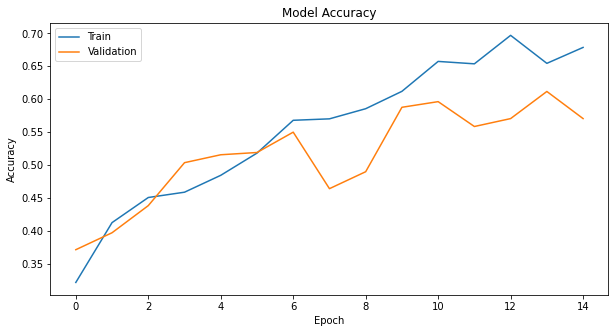

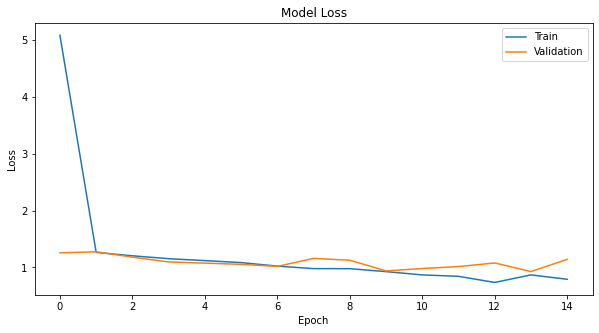

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.71      0.37      0.49       156
         elk       0.53      0.86      0.65       138
      racoon       0.64      0.62      0.63       152
       raven       0.66      0.62      0.64       136

    accuracy                           0.61       582
   macro avg       0.63      0.62      0.60       582
weighted avg       0.64      0.61      0.60       582



As can be seen above, we achieved higher accuracy with Optimizer SGD, because
ADAM-alike adaptive gradient algorithms suffer from worse generalization performance than SGD despite their faster training speed. 

### Impact of Epochs

**Why multiple epochs are needed?** <br>
We want to get good performance on non-training data (validation); usually that takes more than one pass over the training data.

Additionally, and independent of any out-of-sample considerations, it's typical that an iterative optimizer like SGD doesn't reach a (global or local) minima after the first epoch because it cannot find the optimal parameters (weights) in one pass. <br> <br>


**In all cases, is it necessary for the neural network to be trained in several epochs?** <br>
Yes, because as mentioned above, for any iterative problem, there's no reason to believe that the number of updates required to reach a minima happens to coincide with the number of mini-batches in our data set.<br> <br>

**Is it always useful to use more ephochs in training? What are the solutions to deal with probable problems of encreasing epochs?** <br>
No, because as the number of epochs increases, the same number of times weights are changed in the neural network and the boundary goes from underfitting to optimal to overfitting.<br>
Solution: Early stopping is a method that allows us to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset. Actually we should set the number of epochs as high as possible and terminate the training when validation error starts increasing.







*   **Epochs = 20**

In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 20, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/20
 7/43 [===>..........................] - ETA: 29s - loss: 20.9714 - accuracy: 0.2455

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 56s 1s/step - loss: 5.2015 - accuracy: 0.2920 - val_loss: 1.4081 - val_accuracy: 0.3643
Epoch 2/20
43/43 [==============================] - 54s 1s/step - loss: 1.3163 - accuracy: 0.4182 - val_loss: 1.1929 - val_accuracy: 0.4656
Epoch 3/20
43/43 [==============================] - 54s 1s/step - loss: 1.1552 - accuracy: 0.4666 - val_loss: 1.1602 - val_accuracy: 0.5017
Epoch 4/20
43/43 [==============================] - 54s 1s/step - loss: 1.1172 - accuracy: 0.5011 - val_loss: 1.0694 - val_accuracy: 0.4948
Epoch 5/20
43/43 [==============================] - 54s 1s/step - loss: 1.0649 - accuracy: 0.5371 - val_loss: 1.4384 - val_accuracy: 0.3729
Epoch 6/20
43/43 [==============================] - 55s 1s/step - loss: 1.0328 - accuracy: 0.5495 - val_loss: 1.0214 - val_accuracy: 0.5395
Epoch 7/20
43/43 [==============================] - 54s 1s/step - loss: 0.9849 - accuracy: 0.5796 - val_loss: 0.9913 - val_accuracy: 0.5773
Epoch 8/20
43/43 [=============

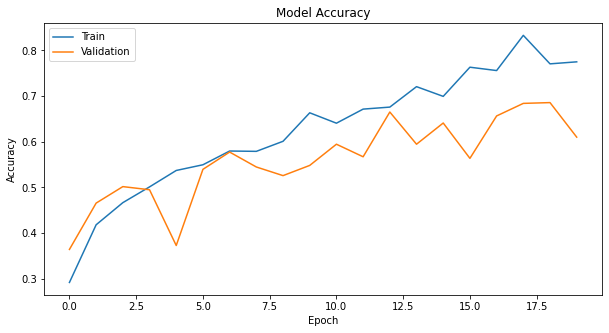

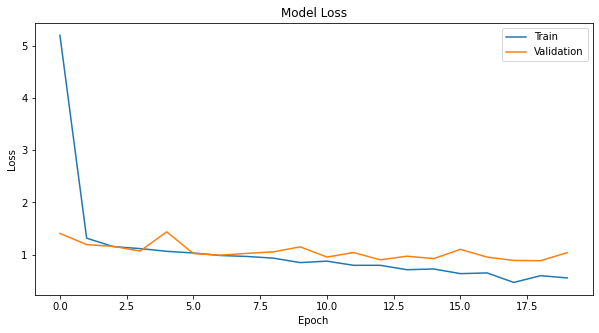

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.59      0.74      0.66       156
         elk       0.73      0.72      0.73       138
      racoon       0.77      0.59      0.66       152
       raven       0.71      0.70      0.70       136

    accuracy                           0.69       582
   macro avg       0.70      0.69      0.69       582
weighted avg       0.70      0.69      0.69       582






*   **Epochs = 30 (Overfitting)**



In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train, validation_data = validation, epochs = 30)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/30
43/43 [==============================] - 55s 1s/step - loss: 5.1058 - accuracy: 0.3228 - val_loss: 1.3230 - val_accuracy: 0.3952
Epoch 2/30
43/43 [==============================] - 54s 1s/step - loss: 1.3150 - accuracy: 0.4380 - val_loss: 1.2206 - val_accuracy: 0.4296
Epoch 3/30
43/43 [==============================] - 54s 1s/step - loss: 1.1485 - accuracy: 0.4813 - val_loss: 1.1537 - val_accuracy: 0.4485
Epoch 4/30
43/43 [==============================] - 54s 1s/step - loss: 1.1319 - accuracy: 0.4945 - val_loss: 1.1319 - val_accuracy: 0.5052
Epoch 5/30
43/43 [==============================] - 54s 1s/step - loss: 1.1062 - accuracy: 0.5033 - val_loss: 1.1795 - val_accuracy: 0.4347
Epoch 6/30
43/43 [==============================] - 55s 1s/step - loss: 1.0591 - accuracy: 0.5319 - val_loss: 1.0472 - val_accuracy: 0.5722
Epoch 7/30
43/43 [==============================] - 54s 1s/step - loss: 1.0707 - accuracy: 0.5158 - val_loss: 1.1478 - val_accuracy: 0.4742
Epoch 8/30
43/43 [==

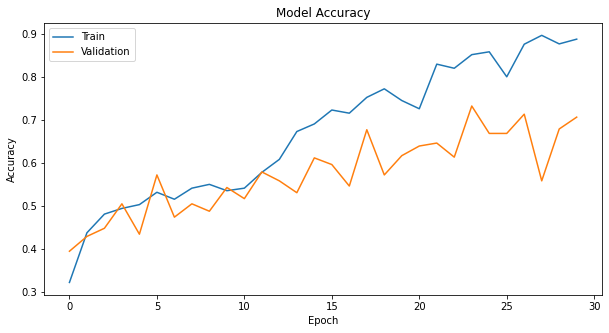

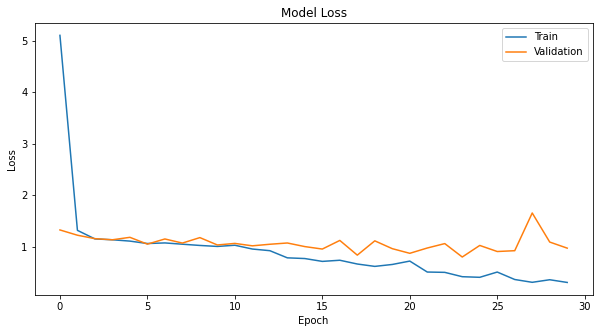

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.86      0.42      0.56       156
         elk       0.77      0.81      0.79       138
      racoon       0.79      0.74      0.76       152
       raven       0.56      0.90      0.69       136

    accuracy                           0.71       582
   macro avg       0.74      0.72      0.70       582
weighted avg       0.75      0.71      0.70       582



In [12]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    mode = 'min',
)

history = model.fit(train, validation_data = validation, epochs = 30, callbacks = [early_stopping_callback])

Epoch 1/30
 4/43 [=>............................] - ETA: 38s - loss: 26.1505 - accuracy: 0.2344

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 56s 1s/step - loss: 5.2468 - accuracy: 0.2803 - val_loss: 1.2848 - val_accuracy: 0.3677
Epoch 2/30
43/43 [==============================] - 54s 1s/step - loss: 1.2734 - accuracy: 0.4285 - val_loss: 1.1393 - val_accuracy: 0.4914
Epoch 3/30
43/43 [==============================] - 55s 1s/step - loss: 1.1682 - accuracy: 0.4718 - val_loss: 1.0996 - val_accuracy: 0.5430
Epoch 4/30
43/43 [==============================] - 55s 1s/step - loss: 1.1230 - accuracy: 0.4894 - val_loss: 1.1671 - val_accuracy: 0.4794
Epoch 5/30
43/43 [==============================] - 55s 1s/step - loss: 1.0843 - accuracy: 0.5092 - val_loss: 1.0789 - val_accuracy: 0.5344
Epoch 6/30
43/43 [==============================] - 55s 1s/step - loss: 1.0673 - accuracy: 0.5371 - val_loss: 1.3355 - val_accuracy: 0.3935
Epoch 7/30
43/43 [==============================] - 56s 1s/step - loss: 1.0827 - accuracy: 0.4996 - val_loss: 1.1479 - val_accuracy: 0.4845
Epoch 8/30
43/43 [=============

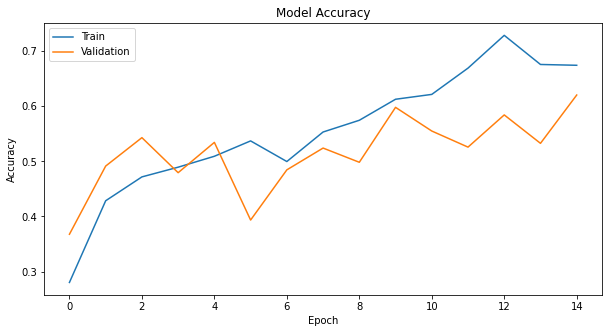

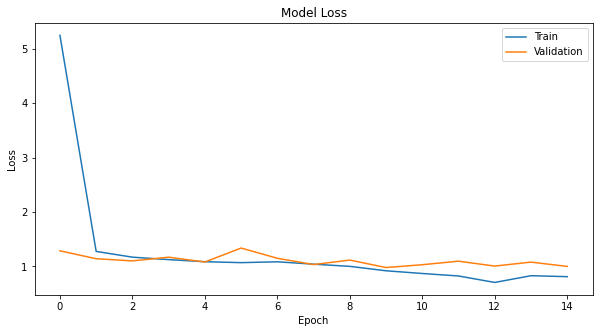

In [15]:
display_model_history(history, model)

In [16]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.50      0.78      0.61       156
         elk       0.63      0.70      0.66       138
      racoon       0.80      0.39      0.53       152
       raven       0.75      0.62      0.68       136

    accuracy                           0.62       582
   macro avg       0.67      0.62      0.62       582
weighted avg       0.67      0.62      0.62       582



As can be seen above, with epochs = 30, the training dataset reaches a very high accuracy, but the validation dataset around epochs = 15 with patience = 5 suffers from overfitting, which we solve this problem with Early Stopping method.

### Impact of Loss Functions

In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = 'mean_squared_error', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 20, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/20
 2/43 [>.............................] - ETA: 53s - loss: 0.2672 - accuracy: 0.3438 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 54s 1s/step - loss: 0.3618 - accuracy: 0.2707 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 2/20
43/43 [==============================] - 51s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 3/20
43/43 [==============================] - 51s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 4/20
43/43 [==============================] - 52s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 5/20
43/43 [==============================] - 51s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 6/20
43/43 [==============================] - 52s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 7/20
43/43 [==============================] - 51s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 8/20
43/43 [=============

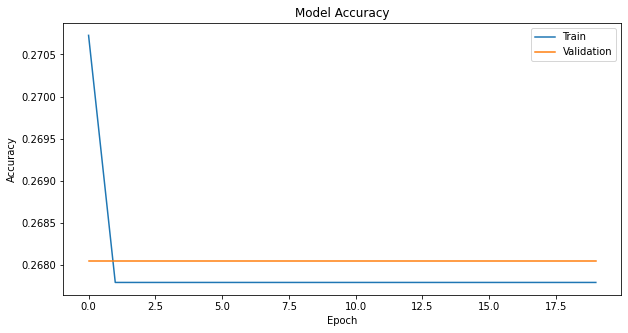

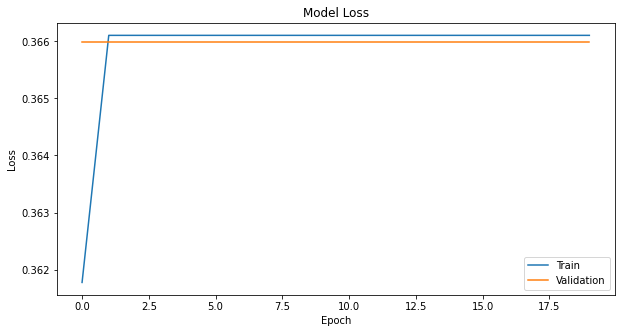

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.27      1.00      0.42       156
         elk       0.00      0.00      0.00       138
      racoon       0.00      0.00      0.00       152
       raven       0.00      0.00      0.00       136

    accuracy                           0.27       582
   macro avg       0.07      0.25      0.11       582
weighted avg       0.07      0.27      0.11       582



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As can be seen above, accuracy and loss are both fixed and stuck in local minima.

**Why not use mean squared error for classification problems?** <br>


1.   Using MSE means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve), while in reality, a dataset that can be classified into categories is not from a normal distribution.
2.   The MSE function is non-convex for classification problems. In simple terms, if a classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while classification models output probabilities in range(0,1) through the softmax activation function.


**When to use mean squared error?** <br>
MSE is a good choice for a Cost function when we are doing Linear Regression (i.e fitting a line through data for extrapolation). In the absence of any knowledge of how the data is distributed assuming normal/gaussian distribution is perfectly reasonable

### Impact of Regularization

### L2 Regularization

In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(output)
output = layers.Dense(1024, activation = 'relu', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(output)
output = layers.Dense(4, activation = 'softmax', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 20, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/20
 2/43 [>.............................] - ETA: 40s - loss: 15.4819 - accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 57s 1s/step - loss: 5.9885 - accuracy: 0.3287 - val_loss: 1.6994 - val_accuracy: 0.4210
Epoch 2/20
43/43 [==============================] - 55s 1s/step - loss: 1.6667 - accuracy: 0.4189 - val_loss: 1.5757 - val_accuracy: 0.4416
Epoch 3/20
43/43 [==============================] - 55s 1s/step - loss: 1.5858 - accuracy: 0.4299 - val_loss: 1.5116 - val_accuracy: 0.5189
Epoch 4/20
43/43 [==============================] - 55s 1s/step - loss: 1.4532 - accuracy: 0.5150 - val_loss: 1.4638 - val_accuracy: 0.5155
Epoch 5/20
43/43 [==============================] - 54s 1s/step - loss: 1.4441 - accuracy: 0.5077 - val_loss: 1.5229 - val_accuracy: 0.4828
Epoch 6/20
43/43 [==============================] - 55s 1s/step - loss: 1.3758 - accuracy: 0.5459 - val_loss: 1.5468 - val_accuracy: 0.4519
Epoch 7/20
43/43 [==============================] - 56s 1s/step - loss: 1.3266 - accuracy: 0.5583 - val_loss: 1.3472 - val_accuracy: 0.5584
Epoch 8/20
43/43 [=============

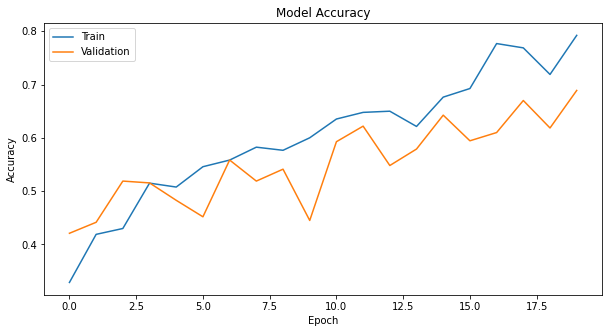

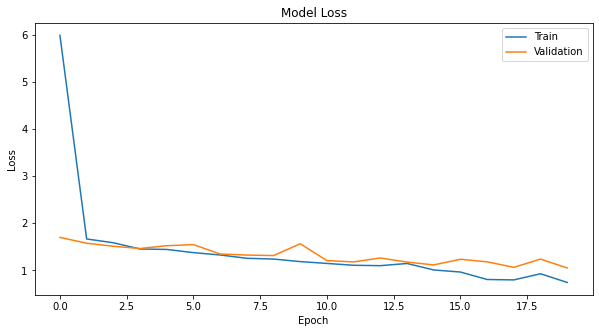

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.65      0.58      0.61       156
         elk       0.64      0.85      0.73       138
      racoon       0.79      0.60      0.68       152
       raven       0.72      0.75      0.73       136

    accuracy                           0.69       582
   macro avg       0.70      0.69      0.69       582
weighted avg       0.70      0.69      0.69       582



As can be seen, L2 Regularization causes that over time, the accuracy of training and validating data will not be much different and overfitting will be reduced. Validation data accuracy has also increased slightly.



#### Dropout

In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(1024, activation = 'relu')(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(4, activation = 'softmax')(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 20, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/20
13/43 [========>.....................] - ETA: 28s - loss: 11.8855 - accuracy: 0.2548

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 55s 1s/step - loss: 4.8134 - accuracy: 0.2876 - val_loss: 1.2405 - val_accuracy: 0.4381
Epoch 2/20
43/43 [==============================] - 52s 1s/step - loss: 1.2683 - accuracy: 0.4013 - val_loss: 1.1924 - val_accuracy: 0.4450
Epoch 3/20
43/43 [==============================] - 52s 1s/step - loss: 1.2545 - accuracy: 0.4079 - val_loss: 1.2158 - val_accuracy: 0.4261
Epoch 4/20
43/43 [==============================] - 52s 1s/step - loss: 1.1562 - accuracy: 0.4629 - val_loss: 1.1441 - val_accuracy: 0.4811
Epoch 5/20
43/43 [==============================] - 52s 1s/step - loss: 1.1505 - accuracy: 0.4732 - val_loss: 1.1209 - val_accuracy: 0.4777
Epoch 6/20
43/43 [==============================] - 52s 1s/step - loss: 1.1064 - accuracy: 0.4894 - val_loss: 1.2172 - val_accuracy: 0.4467
Epoch 7/20
43/43 [==============================] - 53s 1s/step - loss: 1.1082 - accuracy: 0.5026 - val_loss: 1.4013 - val_accuracy: 0.4175
Epoch 8/20
43/43 [=============

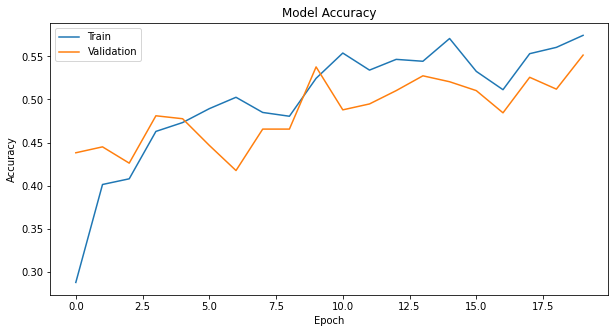

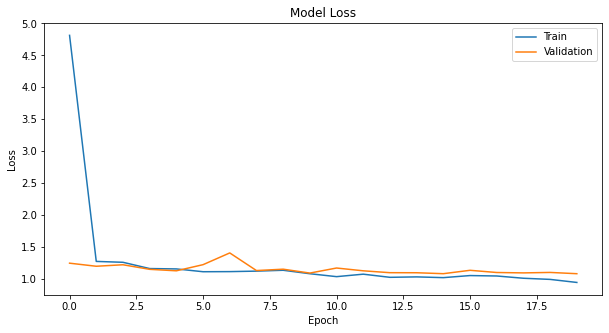

In [ ]:
display_model_history(history, model)

In [ ]:
predicted = np.argmax(model.predict(validation_unshuffled), axis = 1)
actual = validation_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.52      0.59      0.55       156
         elk       0.67      0.23      0.34       138
      racoon       0.49      0.72      0.58       152
       raven       0.67      0.65      0.66       136

    accuracy                           0.55       582
   macro avg       0.58      0.55      0.53       582
weighted avg       0.58      0.55      0.53       582



As can be seen, with dropout = 0.1, the accuracy gradually increases and loss gradually decreases. Also underfitting has occurred in our case.

# Phase Four: Test Data Classification

We use the most optimized neural network model(with highest f1-score) based on the observations in phase three, in order to classify test data.

In [ ]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(output)
output = layers.Dense(1024, activation = 'relu', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(output)
output = layers.Dense(4, activation = 'softmax', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(output)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 20, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/20
43/43 [==============================] - 56s 1s/step - loss: 1.9428 - accuracy: 0.3566 - val_loss: 1.7427 - val_accuracy: 0.3660
Epoch 2/20
43/43 [==============================] - 55s 1s/step - loss: 1.6523 - accuracy: 0.4762 - val_loss: 1.6836 - val_accuracy: 0.4038
Epoch 3/20
43/43 [==============================] - 55s 1s/step - loss: 1.5776 - accuracy: 0.5282 - val_loss: 1.5358 - val_accuracy: 0.5275
Epoch 4/20
43/43 [==============================] - 54s 1s/step - loss: 1.5194 - accuracy: 0.5591 - val_loss: 1.5078 - val_accuracy: 0.5584
Epoch 5/20
43/43 [==============================] - 54s 1s/step - loss: 1.4680 - accuracy: 0.5965 - val_loss: 1.4703 - val_accuracy: 0.5979
Epoch 6/20
43/43 [==============================] - 54s 1s/step - loss: 1.4151 - accuracy: 0.6156 - val_loss: 1.4920 - val_accuracy: 0.5876
Epoch 7/20
43/43 [==============================] - 54s 1s/step - loss: 1.3683 - accuracy: 0.6442 - val_loss: 1.6003 - val_accuracy: 0.4897
Epoch 8/20
43/43 [==

In [ ]:
predicted = np.argmax(model.predict(test_unshuffled), axis = 1)
actual = test_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.70      0.58      0.64       223
         elk       0.74      0.74      0.74       198
      racoon       0.71      0.71      0.71       217
       raven       0.67      0.81      0.73       195

    accuracy                           0.71       833
   macro avg       0.71      0.71      0.71       833
weighted avg       0.71      0.71      0.70       833




*   **Correctly predicted images:**



/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


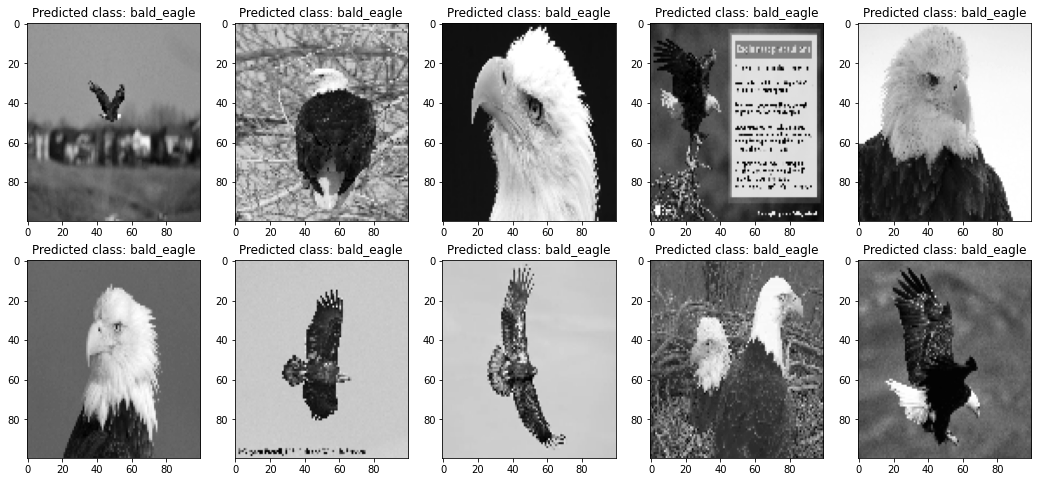

In [ ]:
num = 0
fig, axes = plt.subplots(2, 5, figsize=(18, 8))

for images, labels in test_unshuffled:
  if num == 10:
    break
  for i in range(len(labels)):
    if labels[i].argmax() == predicted[i]:
      axes[num // 5, num % 5].set_title('Predicted class: {}'.format(class_names[predicted[i]]))
      axes[num // 5, num % 5].imshow(images[i].reshape((100, 100)), cmap = 'gray', aspect='auto')
      num += 1
    if num == 10:
      break

*   **Wrongly predicted images:**

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


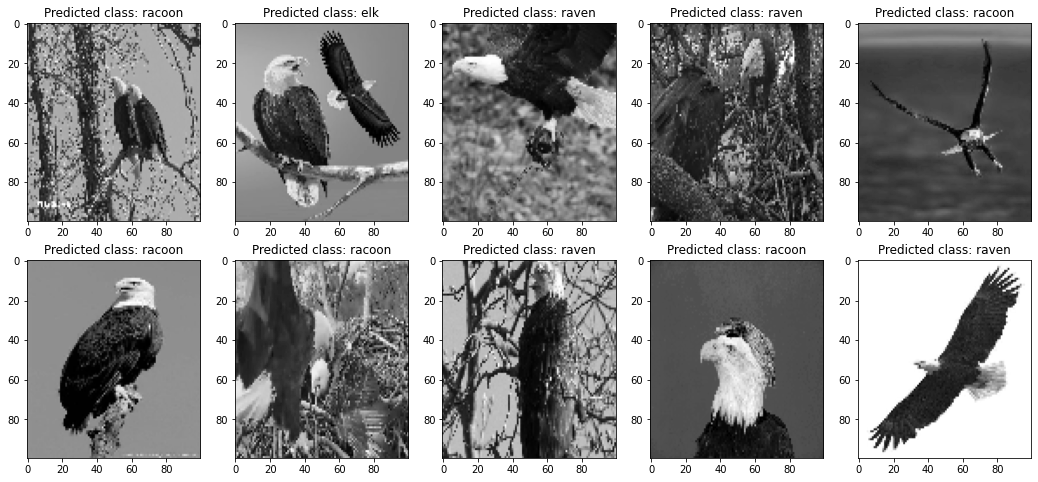

In [ ]:
num = 0
fig, axes = plt.subplots(2, 5, figsize=(18, 8))

for images, labels in test_unshuffled:
  if num == 10:
    break
  for i in range(len(labels)):
    if labels[i].argmax() != predicted[i]:
      axes[num // 5, num % 5].set_title('Predicted class: {}'.format(class_names[predicted[i]]))
      axes[num // 5, num % 5].imshow(images[i].reshape((100, 100)), cmap = 'gray', aspect='auto')
      num += 1
    if num == 10:
      break

**Why does the neural network mispredict some images?**<br>
Bacause there are some other objects like trees in mispredicted images other than the animal alone. Also in some images there are two animals and in some cases raven and bald eagle are similar. These may cause to misprediction.

# Phase Five: Dimensionality Reduction for Data Visualization



In [17]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(output)
output = layers.Dense(1024, activation = 'relu', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(output)
bottleneck = layers.Dense(2, activation = "linear")(output)
output = layers.Dense(4, activation = 'softmax', kernel_regularizer = regularizers.l2(l2 = 0.0001), bias_regularizer = regularizers.l2(l2 = 0.0001))(bottleneck)

model = models.Model(inputs = input, outputs = output)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

history = model.fit(train, validation_data = validation, epochs = 20, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/20
 2/43 [>.............................] - ETA: 28s - loss: 2.2616 - accuracy: 0.2812 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 61s 1s/step - loss: 1.9361 - accuracy: 0.3742 - val_loss: 1.7257 - val_accuracy: 0.4141
Epoch 2/20
43/43 [==============================] - 61s 1s/step - loss: 1.7008 - accuracy: 0.4439 - val_loss: 1.6763 - val_accuracy: 0.4777
Epoch 3/20
43/43 [==============================] - 59s 1s/step - loss: 1.6416 - accuracy: 0.4945 - val_loss: 1.6187 - val_accuracy: 0.4863
Epoch 4/20
43/43 [==============================] - 59s 1s/step - loss: 1.6026 - accuracy: 0.5011 - val_loss: 1.6928 - val_accuracy: 0.4845
Epoch 5/20
43/43 [==============================] - 59s 1s/step - loss: 1.5785 - accuracy: 0.5048 - val_loss: 1.5935 - val_accuracy: 0.5086
Epoch 6/20
43/43 [==============================] - 58s 1s/step - loss: 1.5341 - accuracy: 0.5444 - val_loss: 1.5815 - val_accuracy: 0.4966
Epoch 7/20
43/43 [==============================] - 57s 1s/step - loss: 1.4828 - accuracy: 0.5796 - val_loss: 1.6286 - val_accuracy: 0.4622
Epoch 8/20
43/43 [=============

In [21]:
predicted = np.argmax(model.predict(test_unshuffled), axis = 1)
actual = test_unshuffled.classes
print(classification_report(actual, predicted, target_names = class_names))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

  bald_eagle       0.67      0.57      0.61       223
         elk       0.71      0.70      0.70       198
      racoon       0.58      0.69      0.63       217
       raven       0.77      0.76      0.77       195

    accuracy                           0.68       833
   macro avg       0.68      0.68      0.68       833
weighted avg       0.68      0.68      0.68       833



/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


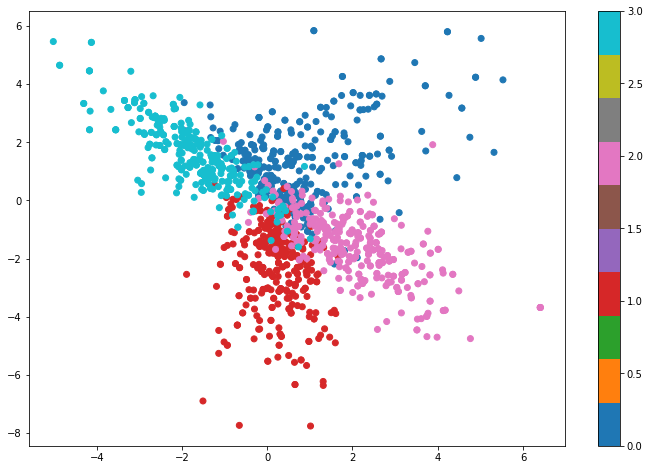

<Figure size 432x288 with 0 Axes>

In [18]:
encoder = models.Model(inputs = input, outputs = bottleneck)
train_enc = encoder.predict(train_unshuffled)
plt.figure(figsize=(12, 8)) 
plt.scatter(train_enc[:, 0], train_enc[:, 1], c = train_unshuffled.classes, cmap='tab10', label = class_names)
plt.colorbar()
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


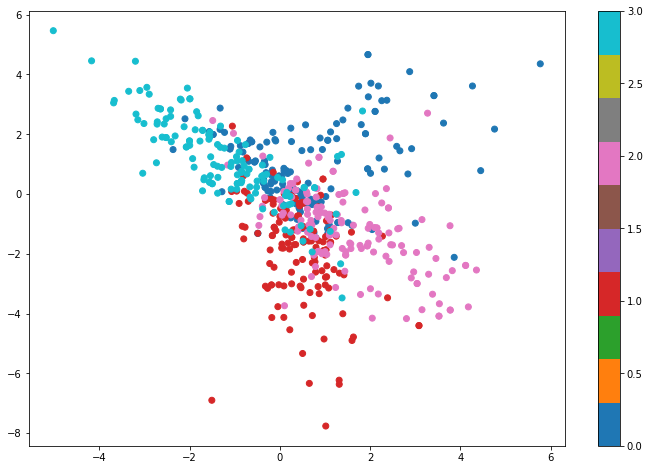

<Figure size 432x288 with 0 Axes>

In [19]:
validation_enc = encoder.predict(validation_unshuffled)
plt.figure(figsize=(12, 8)) 
plt.scatter(validation_enc[:, 0], validation_enc[:, 1], c = validation_unshuffled.classes, cmap='tab10', label = class_names)
plt.colorbar()
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


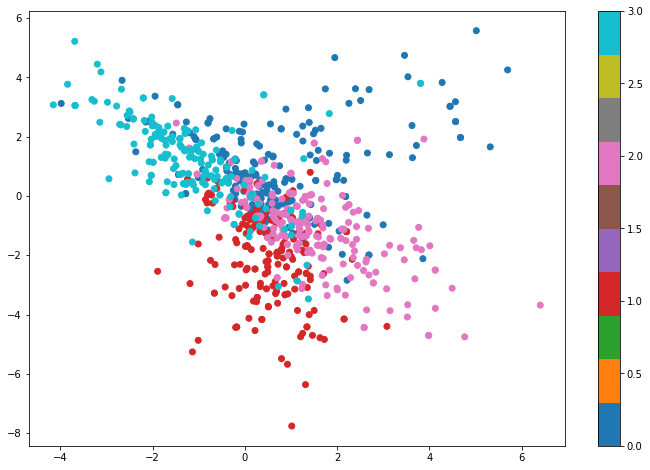

<Figure size 432x288 with 0 Axes>

In [20]:
test_enc = encoder.predict(test_unshuffled)
plt.figure(figsize=(12, 8)) 
plt.scatter(test_enc[:, 0], test_enc[:, 1], c = test_unshuffled.classes, cmap='tab10', label = class_names)
plt.colorbar()
plt.show()
plt.tight_layout()

As can be seen, the neural network hardly distinguishes data belonging to classes 0(bald_eagle) and 2(racoon), but easily distinguishes data belonging to classes 1(elk) and 3(raven), which is consistent with our classification because classes 0 and 2 have less f1-score.

# Conclusion

We are able to build an artificial neural network that can recognize images with an accuracy of 70% using TensorFlow and Keras. We did so by pre-processing the images to make the model more generic, split the dataset into a number of batches and finally build and train the model.